## ImagingEdge for Web

This notebook will contain the scripts that are directly pasted into the ImagingEdge web app.

In [2]:
import pickle

def unpickle_graph():
    with open("G.txt", "rb") as fp:
        G = pickle.load(fp)
    return G

def unpickle_trends():
    with open("bow_trends_all.txt", "rb") as fp:
        bow_trends_all = pickle.load(fp)
    return bow_trends_all

def unpickle_df():
    with open("df.txt", "rb") as fp:
        df = pickle.load(fp)
    return df

In [20]:
bow_trends_all = unpickle_trends()
bow_trends_last = bow_trends_all[2]
with open("bow_converted.txt", "wb") as fp:
    pickle.dump(bow_converted, fp)

In [11]:
def display_n_keys(dict, N=10):
    n = 0
    for key, item in dict.items():
        print(key, item)
        n += 1
        if n >= N:
            return
display_n_keys(bow_trends_last)

('cerebrospinal', 'fluid') {'intercept': 0.9504950495049499, 'slope': 0.02475247524752472, 'resid': array([0.01223252]), 'trend_score': array([2.0234974]), 'vals': array([173., 176., 175., 203., 182.]), 'total_mentions': 909.0}
('vs', 'patients') {'intercept': 0.7608695652173914, 'slope': 0.1195652173913043, 'resid': array([0.11312618]), 'trend_score': array([1.05691906]), 'vals': array([35., 28., 31., 38., 52.]), 'total_mentions': 184.0}
('lesions', 'patients') {'intercept': 0.876068376068376, 'slope': 0.06196581196581189, 'resid': array([0.01333187]), 'trend_score': array([4.64794521]), 'vals': array([ 76.,  91., 100., 101., 100.]), 'total_mentions': 468.0}
('intervention', 'patients') {'intercept': 0.9659863945578224, 'slope': 0.01700680272108848, 'resid': array([0.09105003]), 'trend_score': array([0.18678526]), 'vals': array([33., 27., 24., 28., 35.]), 'total_mentions': 147.0}
('microscopy', 'revealed') {'intercept': 1.0545454545454536, 'slope': -0.027272727272727226, 'resid': arra

In [4]:
def convert_df(df):
    df_convert = df
    nrow = df.shape[0]
    for n in range(nrow):
        score = df.loc[n,"score"]
        df_convert.loc[n,"score"] = score
        key = df.loc[n,"key"]
        df_convert.loc[n,"key"] = ' '.join(key)
    return df_convert
#for i, df_ in enumerate(df):
#    df[i] = convert_df(df_)

In [81]:
def df_to_csv(df):
    for i, df_ in enumerate(df):
        filename = 'df_' + str(i) + '.csv'
        df_.to_csv(filename)

In [17]:
def convert_bow_trends(bow):
    bow_new = {}
    for key, item in bow.items():
        key_new = ' '.join(key)
        item_new = item['vals']
        bow_new.update({key_new:item_new})
    return bow_new
bow_converted = convert_bow_trends(bow_trends_last)

In [ ]:
import pandas as pd
df = pd.DataFrame()
for key, item in bow_converted.items():
    df[key] = item
print(df.loc[:10,:3])

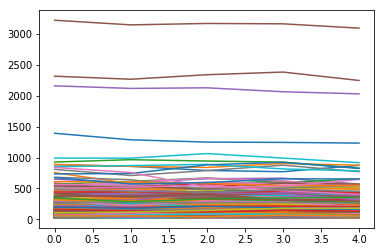

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df)
plt.show()

In [19]:
bow_converted['electron microscopy']

array([889., 856., 839., 903., 876.])

In [22]:
approx_clones = (5*365)/14*2
approx_views = 4*approx_clones
print(approx_clones, approx_views)


260.7142857142857 1042.857142857143
